In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from buildingspy.io.outputfile import Reader

plt.rc('font', family = 'Times New Roman')

In [3]:
path_viz_data = os.path.join(os.getcwd(), 'train_data', 'scenario_visualization')

sc_stable = os.path.join(path_viz_data, 'IEEE_9_Base_Case_OL_Stable30percent.mat')
sc_unstable = os.path.join(path_viz_data, 'IEEE_9_Base_Case_OL_MarginallyStableExampleDamping4percent.mat')

r_stable = Reader(sc_stable, "dymola")
r_unstable = Reader(sc_unstable, "dymola")

(t_sv, v_mag_stable) = r_stable.values('B4.V')
(t_sv, v_angle_stable) = r_stable.values('B4.angle') 

v_real_stable = v_mag_stable * np.cos(v_angle_stable* np.pi/180) * np.cos(2*np.pi*60*t_sv)
v_imag_stable = v_mag_stable * np.sin(v_angle_stable* np.pi/180) * np.sin(2*np.pi*60*t_sv)

(t_uv, v_mag_unstable) = r_unstable.values('B8.V')

(t_si, i_real_stable) = r_stable.values('Line3_9_0.p.ir')
(t_si, i_imag_stable) = r_stable.values('Line3_9_0.p.ii')

i_mag_stable = np.sqrt(np.power(i_real_stable, 2) + np.power(i_imag_stable, 2))

(t_ui, i_real_unstable) = r_unstable.values('Line3_9_0.ir.re')
(t_ui, i_imag_unstable) = r_unstable.values('Line3_9_0.ir.im')

i_mag_unstable = np.sqrt(np.power(i_real_unstable, 2) + np.power(i_imag_unstable, 2))

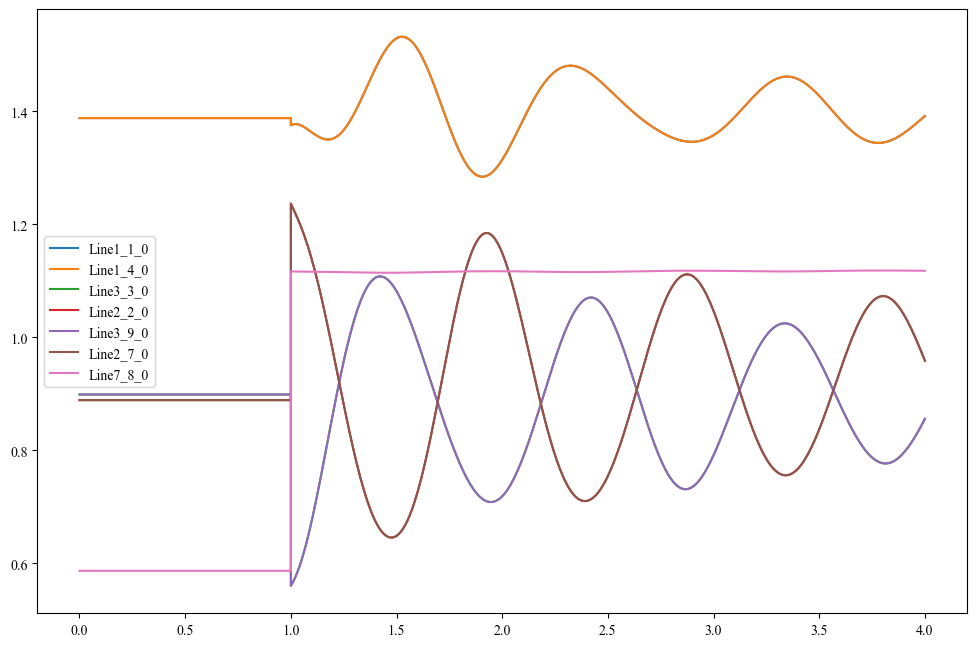

In [4]:
lines = ['Line1_1_0', 'Line1_4_0', 'Line3_3_0', 'Line2_2_0', 'Line3_9_0', 'Line2_7_0', 'Line7_8_0']

i_mag_all = dict.fromkeys(lines)

for line in lines:
    (t, i_r) = r_unstable.values(f'{line}.ir.re')
    (t, i_i) = r_unstable.values(f'{line}.ir.im')
    
    i_mag = np.sqrt(np.power(i_r, 2) + np.power(i_i, 2))
    
    i_mag_all[line] = i_mag
    
fig, axis = plt.subplots(figsize = (12, 8), dpi = 100)
for line in lines:
    plt.plot(t, i_mag_all[line], label = line)
    
plt.legend()

In [298]:
# path_i_data = os.path.join(os.getcwd(), 'train_data', 'IEEE9_currents_raw_505')

# x_train = np.load(os.path.join(path_i_data, 'x_train.npy'))
# y_train = np.load(os.path.join(path_i_data, 'y_train.npy'))
# y_train = np.argmax(y_train, axis = 1)

# # Time vector
# t = np.linspace(0, 4, x_train.shape[1])

# # Current measurements
# i_real_stable = x_train[1, :, 0]
# i_imag_stable = x_train[1, :, 1]

# i_real_unstable = x_train[3, :, 0]
# i_imag_unstable = x_train[3, :, 1]

# i_mag_stable = np.sqrt(np.power(i_real_stable, 2) + np.power(i_imag_stable, 2))
# i_mag_unstable = np.sqrt(np.power(i_real_unstable, 2) + np.power(i_imag_unstable, 2))
# i_ang_stable = np.arctan2(i_imag_stable, i_real_stable)

# # Voltage data
# path_v_data = os.path.join(os.getcwd(), 'train_data', 'IEEE9_noisy_raw_505')

# vx_train = np.load(os.path.join(path_v_data, 'x_train.npy'))
# vy_train = np.load(os.path.join(path_v_data, 'y_train.npy'))
# vy_train = np.argmax(vy_train, axis = 1)

# v_real_stable = vx_train[21, :, 0]
# v_imag_stable = vx_train[21, :, 1]

# sc_volt = 1078

# v_real_unstable = x_train[sc_volt, :, 0]
# v_imag_unstable = x_train[sc_volt, :, 1]
# print(vy_train[sc_volt])

# v_mag_stable = np.sqrt(np.power(v_real_stable, 2) + np.power(v_imag_stable, 2))
# v_mag_unstable = np.sqrt(np.power(v_real_unstable, 2) + np.power(v_imag_unstable, 2))

1


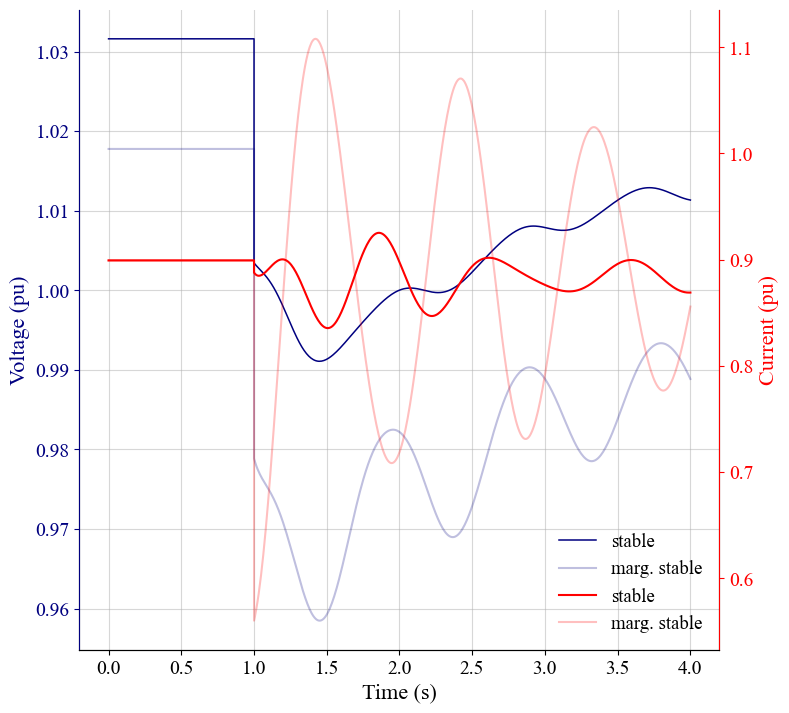

In [11]:
fig, axes = plt.subplots(figsize = (8, 8), dpi = 100)
par1 = axes.twinx()

ax1, = axes.plot(t_sv, v_mag_stable, label = 'stable', color = 'navy', linewidth = 1.1);
ax2, = axes.plot(t_uv, v_mag_unstable, label = 'marg. stable', color = 'navy', alpha = 0.25);

axes.grid(alpha = 0.5)

p1, = par1.plot(t_si, i_mag_stable, label = 'stable', color = 'red');
p2, = par1.plot(t_ui, i_mag_unstable, label = 'marg. stable', color = 'red', alpha = 0.25);
# p3, = par1.plot(t_si, i_mag_stable, label = 'current');

par1.set_frame_on(True)
par1.patch.set_visible(False)

axes.spines['top'].set_visible(False)
par1.spines['top'].set_visible(False)

# Changing color of the y-axis
par1.spines['left'].set_color(ax1.get_color()) # on the left
par1.spines['right'].set_color(p1.get_color()) # on the right

# Changing color of the axis
axes.yaxis.label.set_color(ax1.get_color())
par1.yaxis.label.set_color(p1.get_color())
axes.tick_params(axis = 'y', colors = ax1.get_color(), labelsize = 14)
axes.tick_params(axis = 'x', labelsize = 14)

par1.tick_params(axis = 'y', colors = p1.get_color(), labelsize = 14)

# axes.set_ylim(0.95, 1.05)
axes.set_ylabel('Voltage (pu)', fontsize = 16)
axes.set_xlabel('Time (s)', fontsize = 16)

par1.set_ylabel('Current (pu)', fontsize = 16)

lines = [ax1, ax2, p1, p2]
axes.legend(lines, [l.get_label() for l in lines], loc = 'lower right', frameon = False, prop = {'size' : 13.5});

fig.subplots_adjust(right = 0.9, left = 0.1, top = 0.9 , bottom = 0.1)

fig.savefig('Fig04_Scenario_Visualization.png', dpi = 100, transparent = True, bbox_inches = 'tight')